In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
#from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
import math

In [2]:
import pickle

data_path = '/content/drive/MyDrive/Belgeler'

Xfile = open(data_path + "/X.pickle", "rb")
yfile = open(data_path + "/y.pickle", "rb")

X = pickle.load(Xfile)
y = pickle.load(yfile)

In [3]:
X_test_file = open(data_path + "/X_test.pickle", "rb")
y_test_file = open(data_path + "/y_test.pickle", "rb")

X_test = pickle.load(X_test_file)
y_test = pickle.load(y_test_file)

In [4]:
print(" y shape " + str(y.shape) + " X shape " + str(X.shape) + " y type " + str(type(y)) + " X type " + str(type(X)))

 y shape (28709,) X shape (28709, 48, 48, 1) y type <class 'numpy.ndarray'> X type <class 'numpy.ndarray'>


In [5]:
from tensorflow.python.keras import regularizers
X = X/255.0
model = Sequential()

model.add(Conv2D(32, (5,5), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l2=0.01), input_shape=(48, 48, 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Conv2D(32, (5,5), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

In [6]:
model.add(Conv2D(64, (5,5), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding="same"))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Conv2D(64, (5,5), strides=2, padding="same", activation="relu", kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding="same"))
model.add(Flatten())

In [7]:
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.5)) #yeni
model.add(BatchNormalization())
model.add(Dense(units=7, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0

In [9]:
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.99, nesterov=True, name="SGD"), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10) #Early stopping 
#def step_decay(epoch): #step decay schedule
   #initial_lrate = 0.001
   #drop = 0.5
   #epochs_drop = 10.0
   #lrate = initial_lrate * math.pow(drop,  
           #math.floor((1+epoch)/epochs_drop))
   #return lrate
#callback2 = tf.keras.callbacks.LearningRateScheduler(step_decay)
history = model.fit(X, y, batch_size=256, epochs=150, callbacks=[callback], validation_split=0.3) #150

Epoch 1/150
79/79 [==============================] - 28s 334ms/step - loss: 3.7912 - accuracy: 0.1733 - val_loss: 3.2101 - val_accuracy: 0.2473
Epoch 2/150
79/79 [==============================] - 27s 343ms/step - loss: 3.3462 - accuracy: 0.2211 - val_loss: 3.0579 - val_accuracy: 0.2480
Epoch 3/150
79/79 [==============================] - 26s 329ms/step - loss: 3.0447 - accuracy: 0.2400 - val_loss: 2.8622 - val_accuracy: 0.2526
Epoch 4/150
79/79 [==============================] - 26s 327ms/step - loss: 2.7874 - accuracy: 0.2467 - val_loss: 2.6949 - val_accuracy: 0.2478
Epoch 5/150
79/79 [==============================] - 26s 326ms/step - loss: 2.5467 - accuracy: 0.2648 - val_loss: 2.4839 - val_accuracy: 0.2259
Epoch 6/150
79/79 [==============================] - 26s 328ms/step - loss: 2.3250 - accuracy: 0.2784 - val_loss: 2.2968 - val_accuracy: 0.2569
Epoch 7/150
79/79 [==============================] - 26s 326ms/step - loss: 2.1581 - accuracy: 0.2943 - val_loss: 2.1902 - val_accuracy:

In [11]:
model.evaluate(X_test, y_test)

225/225 [==============================] - 5s 20ms/step - loss: 39.6021 - accuracy: 0.3267


[39.60213088989258, 0.326692670583725]

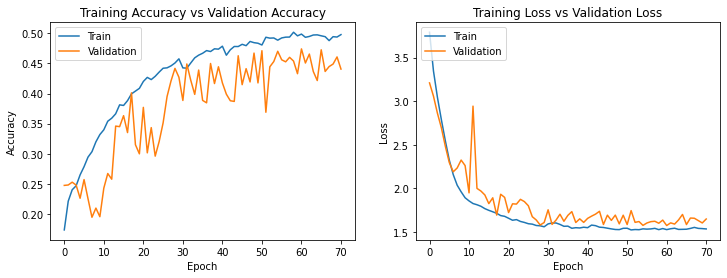

In [12]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()